# Shapely


GEOS is a C/C++ library for computational geometry with a focus on algorithms used in geographic information systems (GIS) software. 

Shapely is a Python package for set-theoretic analysis and manipulation of planar features using (via Python’s ctypes module) functions from the well known and widely deployed GEOS library. GEOS, a port of the Java Topology Suite (JTS), is the geometry engine of the PostGIS spatial extension for the PostgreSQL RDBMS.

https://shapely.readthedocs.io/en/stable/manual.html

In [16]:
from shapely.geometry import Polygon


Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]]).minimum_clearance

1.0

# Spatial Data Model

## Point

In [2]:
from shapely.geometry import Point
point = Point(1, 1)
line = LineString([(2, 0), (2, 4), (3, 4)])
point.hausdorff_distance(line)
#  The Hausdorff distance between two geometries is the furthest distance that 
# a point on either geometry can be from the nearest point to it on the other geometry.

3.605551275463989

In [3]:
point.distance(Point(3, 4))

3.605551275463989

In [4]:
donut = Point(0, 0).buffer(2.0).difference(Point(0, 0).buffer(1.0))
donut.centroid.wkt

'POINT (0.0000000000000001 0)'

In [5]:
donut.representative_point().wkt

'POINT (1.4975923633360986 0.0490085701647802)'

In [11]:
point = Point(1, 1)
point.length
point.bounds
point.coords[:]

[(1.0, 1.0)]

## LineString

In [22]:
from shapely.geometry import LineString
# spline

line = LineString([(0, 0), (1, 1)])
line.coords[:]
line.area

0.0

In [23]:
line.length

1.4142135623730951

## LinearRing

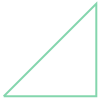

In [36]:
from shapely.geometry import LinearRing
# closed spline
ring = LinearRing([(0, 0), (1, 1), (1, 0)])
ring

In [ ]:
ring.area

In [21]:
ring.length

3.414213562373095

In [25]:
ring.bounds

(0.0, 0.0, 1.0, 1.0)

## Polygon

如果内部空洞的边和模型的外边重叠，或者点重叠都会是无效的，即使内部的多个空洞的边或点有重叠也是无效的。shapely在创建时不会检查是否有效，只有在操作模型时才会报错。

In [26]:
from shapely.geometry import Polygon
polygon = Polygon([(0, 0), (1, 1), (1, 0)])
polygon.area

0.5

In [27]:
polygon.length

3.414213562373095

In [28]:
polygon.bounds

(0.0, 0.0, 1.0, 1.0)

In [29]:
list(polygon.exterior.coords)

[(0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0)]

In [30]:
list(polygon.interiors)

[]

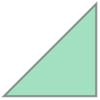

In [34]:
# The Polygon constructor also accepts instances of LineString and LinearRing.
coords = [(0, 0), (1, 1), (1, 0)]
r = LinearRing(coords)
s = Polygon(r)
s.area
s

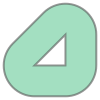

In [35]:
t = Polygon(s.buffer(1.0).exterior, [r])
t.area
t

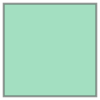

In [33]:
from shapely.geometry import box
b = box(0.0, 0.0, 1.0, 1.0)
b

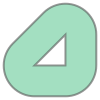

In [50]:
from shapely.geometry.polygon import orient
ot = orient(t, 0.50)
ot

## Collections

多种元素可以合并成为集合


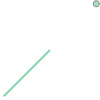

In [54]:
a = LineString([(0, 0), (1, 1), (1,2), (2,2)])
b = LineString([(0, 0), (1, 1), (2,1), (2,2)])
x = a.intersection(b)
x

In [56]:
from pprint import pprint

pprint(list(x.geoms))

### Collections of Points

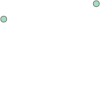

In [60]:
from shapely.geometry import MultiPoint
points = MultiPoint([(0.0, 0.0), (12.0, 2.0)])
points.bounds

points

### Collections of Lines

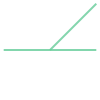

In [62]:
from shapely.geometry import MultiLineString
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
lines = MultiLineString(coords)
lines

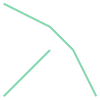

In [63]:
from shapely.geometry import MultiLineString

mline1 = MultiLineString([((0, 0), (1, 1)), ((0, 2),  (1, 1.5), (1.5, 1), (2, 0))])
mline1

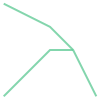

In [65]:
mline2 = MultiLineString([((0, 0), (1, 1), (1.5, 1)), ((0, 2), (1, 1.5), (1.5, 1), (2, 0))])
mline2

### Collections of Polygons

In [66]:
polygons = MultiPolygon([polygon, s, t])
len(polygons.geoms)

3

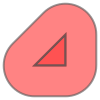

In [67]:
polygons

In [68]:
polygons.bounds

(-1.0, -1.0, 2.0, 2.0)

## Empty features

In [69]:
line = LineString()
line.is_empty

True

## Coordinate sequences

In [70]:
line = LineString([(0, 1), (2, 3), (4, 5)])
line.coords

In [71]:
line.coords[1:]

[(2.0, 3.0), (4.0, 5.0)]

In [72]:
for x, y in line.coords:
    print("x={}, y={}".format(x, y))

x=0.0, y=1.0
x=2.0, y=3.0
x=4.0, y=5.0


## Linear Referencing Methods

LineStrings或MultiLineStrings上一维定位参数

Shapely supports linear referencing based on length or distance, evaluating the distance along a geometric object to the projection of a given point, or the point at a given distance along the object.

- interpolate()
    
    Return a point at the specified distance along a linear geometric object.
    输入一个距离值（亦可标准化），返回线性模型（线）上该长度位置的点。
    
    
- project()
    
    Returns the distance along this geometric object to a point nearest the other object.
    输入一个点，返回该点距离令一个模型最近位置的点的距离值。
    

In [93]:
l =  LineString([(0, 0), (0, 1), (1, 1)])
ip = l.interpolate(1.5) 
# interpolate()
# Return a point at the specified distance along a linear geometric object.
# 输入一个距离值（亦可标准化），返回线性模型（线）上该长度位置的点。
rs = [l, ip]
ip.wkt

'POINT (0.5 1)'

In [96]:
# project()
# Returns the distance along this geometric object to a point nearest the other object.
# 输入一个点，返回该点距离令一个模型最近位置的点的距离值。
ip = Point((0.5,1.5))
LineString([(0, 0), (0, 1), (1, 1)]).project(ip)
rp = l.interpolate(1.5)
rp.wkt

'POINT (0.5 1)'

In [97]:
def cut(line, distance):
    # Cuts a line in two at a distance from its starting point
    if distance <= 0.0 or distance >= line.length:
        return [LineString(line)]
    coords = list(line.coords)
    for i, p in enumerate(coords):
        pd = line.project(Point(p))
        if pd == distance:
            return [
                LineString(coords[:i+1]),
                LineString(coords[i:])]
        if pd > distance:
            cp = line.interpolate(distance)
            return [
                LineString(coords[:i] + [(cp.x, cp.y)]),
                LineString([(cp.x, cp.y)] + coords[i:])]
        


In [98]:
line = LineString([(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)])
pprint([list(x.coords) for x in cut(line, 1.0)])

[[(0.0, 0.0), (1.0, 0.0)],
 [(1.0, 0.0), (2.0, 0.0), (3.0, 0.0), (4.0, 0.0), (5.0, 0.0)]]


## Predicates and Relationships

Whether unary or binary, all return **True or False**.

### Unary Predicates

Standard unary predicates are implemented as **read-only** property attributes.

In [99]:
Point(0, 0).has_z

False

In [100]:
Point(0, 0, 0).has_z

True

In [101]:
LinearRing([(1,0), (1,1), (0,0)]).is_ccw
# counter-clockwise

True

In [102]:
LinearRing([(1,0), (1,1), (0,0)]).is_ccw
ring.is_ccw

False

In [105]:
ring.coords = list(ring.coords)[::-1]
ring.is_ccw

True

In [106]:
Point().is_empty

True

In [107]:
from operator import attrgetter
empties = filter(attrgetter('is_empty'), [Point(), Point(0, 0)])
len(empties)

TypeError: object of type 'filter' has no len()

In [108]:
LineString([(0, 0), (1, 1), (1, -1)]).is_ring

False

In [109]:
LinearRing([(0, 0), (1, 1), (1, -1)]).is_ring

True

In [110]:
# Returns True if the feature does not cross itself.
LineString([(0, 0), (1, 1), (1, -1), (0, 1)]).is_simple

False

In [111]:
LineString([(0, 0), (1, 1), (1, -1)]).is_simple

True

In [112]:
MultiPolygon([Point(0, 0).buffer(2.0), Point(1, 1).buffer(2.0)]).is_valid

False

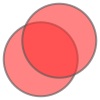

In [113]:
MultiPolygon([Point(0, 0).buffer(2.0), Point(1, 1).buffer(2.0)])

In [116]:
from functools import wraps
from shapely.geos import TopologicalError

def validate(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        ob = func(*args, **kwargs)
        if not ob.is_valid:
            raise TopologicalError(
                "Given arguments do not determine a valid geometric object")
        return ob
    return wrapper

@validate
def ring(coordinates):
    return LinearRing(coordinates)

coords = [(0, 0), (1, 1), (1, -1), (0, 1)]

ring(coords)

# TopologicalError: Given arguments do not determine a valid geometric object

TopologicalError: Given arguments do not determine a valid geometric object

### Binary Predicates
Standard binary predicates are implemented as **methods**.

- object.\_\_eq\_\_(other)
    
    Returns True if the two objects are of the same geometric type, and the coordinates of the two objects match precisely.
    

- object.equals(other)
    
    Returns True if the set-theoretic boundary, interior, and exterior of the object coincide with those of the other.
    
    
- object.almost_equals(other\[, decimal=6\])
    
    Returns True if the object is approximately equal to the other at all points to specified decimal place precision.


- object.contains(other)
    
    Returns True if no points of other lie in the exterior of the object and at least one point of the interior of other lies in the interior of object.


- object.covers(other)
    
    Returns True if every point of other is a point on the interior or boundary of object. This is similar to object.contains(other) except that this does not require any interior points of other to lie in the interior of object.


- object.covered_by(other)
    
    Returns True if every point of object is a point on the interior or boundary of other. This is equivalent to other.covers(object).


- object.crosses(other)

    Returns True if the interior of the object intersects the interior of the other but does not contain it, and the dimension of the intersection is less than the dimension of the one or the other.
    
    

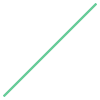

In [120]:
a = LineString([(0, 0), (1, 1)])
b = LineString([(0, 0), (0.5, 0.5), (1, 1)])
c = LineString([(0, 0), (0, 0), (1, 1)])


In [121]:
a.equals(b)

True

In [122]:
a == b

False

In [123]:
b.equals(c)

True

In [124]:
b == c

False

In [125]:
coords = [(0, 0), (1, 1)]
LineString(coords).contains(Point(0.5, 0.5))

True

In [126]:
Point(0.5, 0.5).within(LineString(coords))

True

In [127]:
LineString(coords).contains(Point(1.0, 1.0))

False

In [133]:
line = LineString(coords)
contained = filter(line.contains, [Point(), Point(0.5, 0.5)])
[p.wkt for p in contained]

['POINT (0.5 0.5)']

In [137]:
coords = [(0, 0), (1, 1)]

LineString(coords).crosses(LineString([(0, 1), (1, 0)]))

True

In [138]:
LineString(coords).crosses(Point(0.5, 0.5))

# A line does not cross a point that it contains.

False

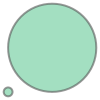

In [154]:
MultiPolygon([Point(0, 0).buffer(0.1),Point(1, 1).buffer(1)])

In [145]:
Point(0, 0).buffer(0.1).disjoint(Point(1, 1).buffer(1))
# Returns True if the boundary and interior of the object do not intersect at all 
# with those of the other.

True

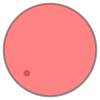

In [152]:
MultiPolygon([Point(0, 0).buffer(0.1),Point(1, 1).buffer(2)])

In [153]:
Point(0, 0).buffer(0.1).disjoint(Point(1, 1).buffer(2))
# Returns True if the boundary and interior of the object do not intersect at all 
# with those of the other.

False

**object.intersects(other)**

Returns True if the boundary or interior of the object intersect in any way with those of the other.

In other words, geometric objects intersect if they have any boundary or interior point in common.

**object.overlaps(other)**

Returns True if the geometries have more than one but not all points in common, have the same dimension, and the intersection of the interiors of the geometries has the same dimension as the geometries themselves.

**object.touches(other)**

Returns True if the objects have at least one point in common and their interiors do not intersect with any part of the other.

In [155]:
Point(0, 0).buffer(0.1).intersects(Point(1, 1).buffer(2))

True

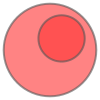

In [159]:

MultiPolygon([Point(0, 0).buffer(4),Point(1, 1).buffer(2)])

In [160]:
Point(0, 0).buffer(4).overlaps(Point(1, 1).buffer(2))

False

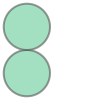

In [163]:
MultiPolygon([Point(0, 0).buffer(0.5),Point(0, 1).buffer(0.5)])

In [165]:
Point(0, 0).buffer(0.5).touches(Point(0, 1).buffer(0.5))

False

In [166]:
a = LineString([(0, 0), (1, 1)])
b = LineString([(1, 1), (2, 2)])
a.touches(b)

True

**object.within(other)**

Returns True if the object’s boundary and interior intersect only with the interior of the other (not its boundary or exterior).

是否在另一个模型的内部相交。

In [183]:
a = Point(2, 2)
b = Polygon([[1, 1], [1, 3], [3, 3], [3, 1]])
c = Polygon([[0, 0], [0, 4], [4, 4], [4, 0]])
d = Point(-1, -1)

features = [c, a, d, b, c]

# As the howto says, the less than comparison is guaranteed to be used in sorting.
# 大小比较底层调用的是排序函数


class Within:
    def __init__(self, o):
        self.o = o
    def __lt__(self, other):
        return self.o.within(other.o)
    


In [185]:
Within(d) < Within(c)


False

In [188]:
sorted(features, key=Within, reverse=True)

## DE-9IM Relationships

DE-9IM : Dimensionally Extended Nine-Intersection Model 尺寸延伸九个交叉点模型

**object.relate(other)**

Returns a string representation of the DE-9IM matrix of relationships between an object’s interior, boundary, exterior and those of another geometric object.

In [189]:
Point(0, 0).relate(LineString([(0, 0), (1, 1)]))

'F0FFFF102'

In [190]:
point = Point(0.5, 0.5)
square = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
square.relate_pattern(point, 'T*****FF*')

True

In [191]:
point.within(square)

True

## Spatial Analysis Methods

### Set-theoretic Methods

These methods will always return **a geometric object**. An intersection of disjoint geometries for example will return an empty GeometryCollection, not None or False. To test for a non-empty result, use the geometry’s is_empty property.

object.boundary

The boundary of a polygon is a line,

the boundary of a line is a collection of points. 

The boundary of a point is an empty (null) collection.

In [197]:
coords = [((0, 0), (1, 1)), ((-1, 0), (1, 0))]
lines = MultiLineString(coords)
type(lines.boundary) # the boundary of a line is a collection of points.

shapely.geometry.multipoint.MultiPoint

In [196]:
pprint(list(lines.boundary.geoms))

In [198]:
type(lines.boundary.boundary) # The boundary of a point is an empty (null) collection.

shapely.geometry.collection.GeometryCollection

In [199]:
lines.boundary.boundary.is_empty

True

object.centroid

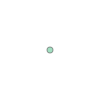

In [200]:
LineString([(0, 0), (1, 1)]).centroid

布尔运算：

- object.difference(other)    can be accessed with minus, -

- object.intersection(other)   can be accessed with and, &  

- object.symmetric_difference(other)   can be accessed with xor, ^

- object.union(other)      can be accessed with or, |

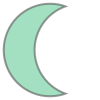

In [201]:
a = Point(1, 1).buffer(1.5)
b = Point(2, 1).buffer(1.5)
a.difference(b)

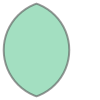

In [202]:
a.intersection(b)

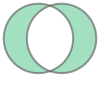

In [203]:
a.symmetric_difference(b)

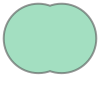

In [204]:
a.union(b)

# union() is an expensive way to find the cumulative union of many objects. 
# See shapely.ops.unary_union() for a more effective method.

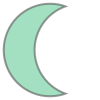

In [205]:
a - b

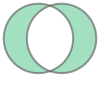

In [206]:
a ^ b

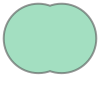

In [207]:
a | b

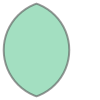

In [208]:
a & b


## Constructive Methods


object.buffer(distance, resolution=16, cap_style=1, join_style=1, mitre_limit=5.0, single_sided=False)

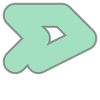

In [209]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
dilated = line.buffer(0.5)
dilated

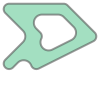

In [210]:
eroded = dilated.buffer(-0.3)
eroded

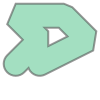

In [219]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
line.buffer(distance = 0.5, cap_style=1, join_style=3)

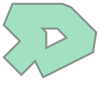

In [220]:
line.buffer(distance = 0.5, cap_style=2, join_style=3)

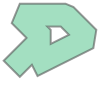

In [221]:
line.buffer(distance = 0.5, cap_style=3, join_style=3)

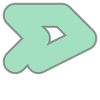

In [222]:
line.buffer(distance = 0.5, cap_style=1, join_style=1)

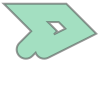

In [223]:
line.buffer(distance = 0.5, cap_style=1, join_style=2)

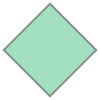

In [225]:
q = Point(0, 0).buffer(10.0, resolution=1)
q

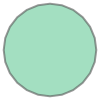

In [229]:
q = Point(0, 0).buffer(10.0, resolution=6)
q

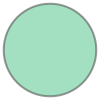

In [228]:
q = Point(0, 0).buffer(10.0, resolution=16)
q

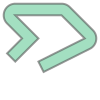

In [231]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
# a positive distance indicates the left-hand side
left_hand_side = line.buffer(0.5, single_sided=True)
left_hand_side


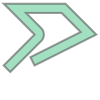

In [232]:
# a negative distance indicates the right-hand side
right_hand_side = line.buffer(-0.3, single_sided=True)
right_hand_side

**object.convex_hull**

Returns a representation of the smallest convex Polygon containing all the points in the object unless the number of points in the object is less than three. For two points, the convex hull collapses to a LineString; for 1, a Point.

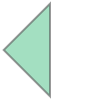

In [233]:
MultiPoint([(0, 0), (1, 1), (1, -1)]).convex_hull

**object.envelope**

Returns a representation of the point or smallest rectangular polygon (with sides parallel to the coordinate axes) that contains the object.

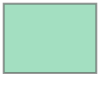

In [238]:
MultiPoint([(0.356, -0.23), (2, 1)]).envelope

**object.minimum_rotated_rectangle**

Returns the general minimum bounding rectangle that contains the object. Unlike envelope this rectangle is not constrained to be parallel to the coordinate axes. If the convex hull of the object is a degenerate (line or point) this degenerate is returned.

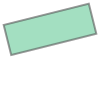

In [239]:
MultiPoint([(0,0),(1,1),(2,0.5)]).minimum_rotated_rectangle

**object.parallel_offset(distance, side, resolution=16, join_style=1, mitre_limit=5.0)**

Returns a LineString or MultiLineString geometry at a distance from the object on its right or its left side.

Mitre_Limit参数可以控制严重姿势的角落（以英语英语，en-GB拼写）控制。平行线的角落将从原始的比大多数地方进一步与斜线连接风格。该进一步距离与指定距离的比率是斜斜率。超过限制的比率的角落将被倾斜。

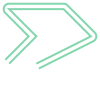

In [257]:
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
line_parallel = line.parallel_offset(-0.2, join_style=1, mitre_limit=5.0)

multilines = MultiLineString([line, line_parallel])
multilines

**object.simplify(tolerance, preserve_topology=True)**

Returns a simplified representation of the geometric object.

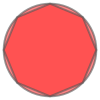

In [262]:
p = Point(0.0, 0.0)
x = p.buffer(1.0)
s = x.simplify(0.2, preserve_topology=False)
MultiPolygon([x,s])

## Affine Transformations

A collection of affine transform functions are in the shapely.affinity module, which return transformed geometries by either directly supplying coefficients to an affine transformation matrix, or by using a specific, named transform (rotate, scale, etc.). The functions can be used with all geometry types (except GeometryCollection), and 3D types are either preserved or supported by 3D affine transformations.

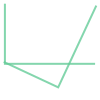

In [272]:
from shapely import affinity
line = LineString([(1, 3), (1, 1), (4, 1)])
rotated_a = affinity.rotate(line, 65)
rotated_b = affinity.rotate(line, 65, origin='centroid')
MultiLineString([line,rotated_a])

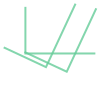

In [273]:
MultiLineString([line,rotated_a,rotated_b])


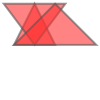

In [274]:
triangle = Polygon([(1, 1), (2, 3), (3, 1)])
triangle_a = affinity.scale(triangle, xfact=1.5, yfact=-1)
triangle_b = affinity.scale(triangle, xfact=2, origin=(1,1))
MultiPolygon([triangle,triangle_a,triangle_b])

### Other Transformations

Shapely supports map projections and other arbitrary transformations of geometric objects.

...

没看懂


## Other Operations
### Merging Linear Features

Sequences of touching lines can be merged into MultiLineStrings or Polygons using functions in the shapely.ops module.


In [276]:
from shapely.ops import polygonize
lines = [
    ((0, 0), (1, 1)),
    ((0, 0), (0, 1)),
    ((0, 1), (1, 1)),
    ((1, 1), (1, 0)),
    ((1, 0), (0, 0))
    ]
pprint(list(polygonize(lines)))

# Returns an iterator over polygons constructed from the input lines.

In [287]:
from shapely.ops import polygonize_full
lines = [
    ((0, 0), (1, 1)),
    ((0, 0), (0, 1)),
    ((0, 1), (1, 1)),
    ((1, 1), (1, 0)),
    ((1, 0), (0, 0)),
    ((5, 5), (6, 6)),
    ((1, 1), (10, 10)),
    ]
result, dangles, cuts, invalids = polygonize_full(lines)
len(result.geoms)

2

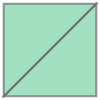

In [288]:
result

In [289]:
dangles 
# Dangles are edges which have one or both ends which are not incident on another edge endpoint. 
# 悬挂是具有一个或两个端部的边缘，其不入射在另一个边缘端点上。

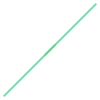

In [290]:
cuts # Cut edges are connected at both ends but do not form part of polygon.

In [291]:
invalids # Invalid ring lines form rings which are invalid (bowties, etc).

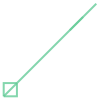

In [292]:
from shapely.ops import linemerge
lines = [
    ((0, 0), (1, 1)),
    ((0, 0), (0, 1)),
    ((0, 1), (1, 1)),
    ((1, 1), (1, 0)),
    ((1, 0), (0, 0)),
    ((5, 5), (6, 6)),
    ((1, 1), (7, 7)),
    ]
linemerge(lines)

## Efficient Rectangle Clipping

shapely.ops.clip_by_rect(geom, xmin, ymin, xmax, ymax)

The geometry is clipped in a fast but possibly dirty way. The output is not guaranteed to be valid. No exceptions will be raised for topological errors.

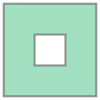

In [296]:
from shapely.geometry import Polygon
from shapely.ops import clip_by_rect
polygon = Polygon(
       shell=[(0, 0), (0, 30), (30, 30), (30, 0), (0, 0)],
       holes=[[(10, 10), (20, 10), (20, 20), (10, 20), (10, 10)]],
    )
clipped_polygon = clip_by_rect(polygon, 5, 5, 15, 15)
polygon

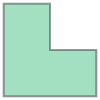

In [295]:
clipped_polygon

## Efficient Unions

The unary_union() function in shapely.ops is more efficient than accumulating with union().

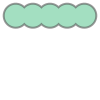

In [297]:
from shapely.ops import unary_union
polygons = [Point(i, 0).buffer(0.7) for i in range(5)]
unary_union(polygons)


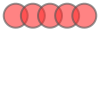

In [298]:
# Because the union merges the areas of overlapping Polygons it can be used 
# in an attempt to fix invalid MultiPolygons. As with the zero distance buffer() 
# trick, your mileage may vary when using this.

m = MultiPolygon(polygons)
m

In [299]:
m.area

7.684543801837549

In [300]:
m.is_valid

False

In [301]:
unary_union(m).area

6.610301355116799

In [302]:
unary_union(m).is_valid

True

### Delaunay triangulation 

    Delaunay三角,临近点连线，但不会有相交线。
    


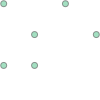

In [304]:
from shapely.ops import triangulate
points = MultiPoint([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
triangles = triangulate(points)
points

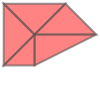

In [306]:
MultiPolygon(triangles)

### Voronoi Diagram

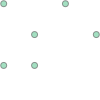

In [308]:
from shapely.ops import voronoi_diagram
points = MultiPoint([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
regions = voronoi_diagram(points)
points

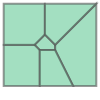

In [309]:
regions

### Nearest points

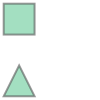

In [310]:
from shapely.ops import nearest_points
triangle = Polygon([(0, 0), (1, 0), (0.5, 1), (0, 0)])
square = Polygon([(0, 2), (1, 2), (1, 3), (0, 3), (0, 2)])
MultiPolygon([triangle, square])

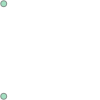

In [314]:
MultiPoint([o for o in nearest_points(triangle, square)])

In [315]:
[o.wkt for o in nearest_points(triangle, square)]

['POINT (0.5 1)', 'POINT (0.5 2)']

### Snapping

snaps the vertices in one geometry to the vertices in a second geometry with a given tolerance.

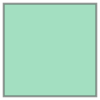

In [319]:
from shapely.ops import snap
square = Polygon([(1,1), (2, 1), (2, 2), (1, 2), (1, 1)])
line = LineString([(0,0), (0.8, 0.8), (1.8, 0.95), (2.6, 0.5)])
square

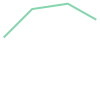

In [320]:
line

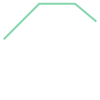

In [325]:
result = snap(line, square, 0.5)
result

In [323]:
result.wkt

'LINESTRING (0 0, 1 1, 2 1, 2.6 0.5)'

In [324]:
line.wkt

'LINESTRING (0 0, 0.8 0.8, 1.8 0.95, 2.6 0.5)'

### Shared paths

finds the shared paths between two linear geometries.

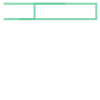

In [333]:
from shapely.ops import shared_paths
g1 = LineString([(0, 0), (10, 0), (10, 5), (20, 5)])
g2 = LineString([(5, 0), (30, 0), (30, 5), (0, 5)])
forward, backward = shared_paths(g1, g2).geoms
MultiLineString([g1, g2 ])

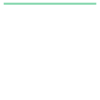

In [330]:
forward

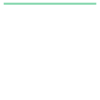

In [331]:
backward

### Splitting

splits a geometry by another geometry.

Splits a geometry by another geometry and returns a collection of geometries.

The function supports:

- Splitting a (Multi)LineString by a (Multi)Point or (Multi)LineString or (Multi)Polygon boundary

- Splitting a (Multi)Polygon by a LineString

In [335]:
from shapely.ops import split
pt = Point((1, 1))
line = LineString([(0,0), (2,2)])
result = split(line, pt)
result.wkt

'GEOMETRYCOLLECTION (LINESTRING (0 0, 1 1), LINESTRING (1 1, 2 2))'

### Substring

returns a line segment between specified distances along a LineString.

In [336]:
from shapely.geometry import LineString
from shapely.ops import substring
ls = LineString((i, 0) for i in range(6))
ls.wkt

'LINESTRING (0 0, 1 0, 2 0, 3 0, 4 0, 5 0)'

In [339]:
substring(ls, start_dist=1, end_dist=3).wkt

'LINESTRING (1 0, 2 0, 3 0)'

In [340]:
substring(ls, start_dist=3, end_dist=1).wkt

'LINESTRING (3 0, 2 0, 1 0)'

In [341]:
substring(ls, start_dist=1, end_dist=-3).wkt

'LINESTRING (1 0, 2 0)'

In [342]:
substring(ls, start_dist=0.2, end_dist=-0.6, normalized=True).wkt

'LINESTRING (1 0, 2 0)'

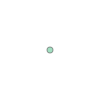

In [343]:
substring(ls, start_dist=2.5, end_dist=-2.5)

## Prepared Geometry Operations

Shapely可以被处理为支持更有效的操作批次的状态。

To test one polygon containment against a large batch of points, one should first use the prepared.prep() function.

In [344]:
from shapely.geometry import Point
from shapely.prepared import prep
points = [...] # large list of points
polygon = Point(0.0, 0.0).buffer(1.0)
prepared_polygon = prep(polygon)
prepared_polygon

Prepared geometries instances have the following methods: contains, contains_properly, covers, and intersects.

准备好的几何实例具有以下方法：包含，包含，封面和相交。

## Diagnostics

Returns a string explaining the validity or invalidity of the object.


In [345]:
coords = [(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 1), (0, 0)]
p = Polygon(coords)
from shapely.validation import explain_validity
explain_validity(p)
# Returns a string explaining the validity or invalidity of the object.

'Ring Self-intersection[1 1]'

In [346]:
from shapely.validation import make_valid
coords = [(0, 0), (0, 2), (1, 1), (2, 2), (2, 0), (1, 1), (0, 0)]
p = Polygon(coords)
str(make_valid(p))
# Returns a valid representation of the geometry, if it is invalid. 
# If it is valid, the input geometry will be returned.

'MULTIPOLYGON (((1 1, 0 0, 0 2, 1 1)), ((2 0, 1 1, 2 2, 2 0)))'

In [347]:
from shapely.validation import make_valid
coords = [(0, 2), (0, 1), (2, 0), (0, 0), (0, 2)]
p = Polygon(coords)
str(make_valid(p))

'GEOMETRYCOLLECTION (POLYGON ((2 0, 0 0, 0 1, 2 0)), LINESTRING (0 2, 0 1))'

## Polylabel

Finds the approximate location of the pole of inaccessibility for a given polygon. Based on Vladimir Agafonkin’s [polylabel](https://github.com/mapbox/polylabel).

求一个模型的（近似）最内部点，该点到模型的任意边都是最远的。与模型的重心(centroid)不同。常用于在模型中添加文字标签时的最佳位置。

![polylabel](https://cloud.githubusercontent.com/assets/25395/16745865/864a0a30-47c0-11e6-87bc-58acac41a520.png)

In [348]:
from shapely.ops import polylabel
polygon = LineString([(0, 0), (50, 200), (100, 100), (20, 50),
(-100, -20), (-150, -200)]).buffer(100)
label = polylabel(polygon, tolerance=10)
label.wkt

'POINT (59.35615556364569 121.83919629746435)'

## STR-packed R-tree

Shapely provides an interface to the query-only GEOS R-tree packed using the Sort-Tile-Recursive algorithm. Pass a list of geometry objects to the STRtree constructor to create a spatial index that you can query with another geometric object. Query-only means that once created, the STRtree is immutable. You cannot add or remove geometries.

In [13]:
from shapely.strtree import STRtree
from shapely.geometry import Point
points = [Point(i, i) for i in range(10)]
tree = STRtree(points)
query_geom = Point(2,2).buffer(0.99)
[o.wkt for o in tree.query(query_geom)]
# Returns a list of all geometries in the strtree whose extents intersect the extent of geom.

In [15]:
query_geom = Point(2, 2).buffer(1.0)
[o.wkt for o in tree.query(query_geom)]

['POINT (1 1)', 'POINT (2 2)', 'POINT (3 3)']

This means that a subsequent search through the returned subset using the desired binary predicate (eg. intersects, crosses, contains, overlaps) may be necessary to further filter the results according to their specific spatial relationships.”

In [16]:
[o.wkt for o in tree.query(query_geom) if o.intersects(query_geom)]

['POINT (2 2)']

To get the original indexes of the query results, create an auxiliary dictionary. But use the geometry ids as keys since the shapely geometries themselves are not hashable. 
过的查询结果的原始序列ID，需要使用一个辅助字典来存储。因为shapely模型本身并非可哈希的。

In [17]:
index_by_id = dict((id(pt), i) for i, pt in enumerate(points))
[(index_by_id[id(pt)], pt.wkt) for pt in tree.query(Point(2,2).buffer(1.0))]

[(1, 'POINT (1 1)'), (2, 'POINT (2 2)'), (3, 'POINT (3 3)')]

**strtree.nearest(geom)**

Returns the nearest geometry in strtree to geom.

In [18]:
tree = STRtree([Point(i, i) for i in range(10)])
tree.nearest(Point(2.2, 2.2)).wkt

'POINT (2 2)'

## Interoperation 互动

一共4种途径。

### Well-Known Formats

- Well Known Text (WKT)

- Well Known Binary (WKB) 

In [20]:
Point(0, 0).wkt

'POINT (0 0)'

In [22]:
Point(0, 0).wkb

b'\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

- 序列化方法：dumps()

To serialize a geometric object to a binary or text string, use dumps().
    
    shapely.wkb.dumps(ob)

        Returns a WKB representation of ob.
    

- 反序列化方法：loads()

To deserialize a string and get a new geometric object of the appropriate type, use loads().
    
    shapely.wkb.loads(wkb)
        
        Returns a geometric object from a WKB representation wkb.

In [23]:
from shapely import wkb
pt = Point(0, 0)
wkb.dumps(pt)

b'\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [24]:
wkb.loads(pt.wkb).wkt

'POINT (0 0)'

- shapely.wkt.dumps(ob)

Returns a WKT representation of ob. Several keyword arguments are available to alter the WKT which is returned; see the docstrings for more details.

- shapely.wkt.loads(wkt)

Returns a geometric object from a WKT representation wkt.

In [25]:
from shapely import wkt
pt = Point(0, 0)
thewkt = wkt.dumps(pt)
thewkt

'POINT (0.0000000000000000 0.0000000000000000)'

In [26]:
pt.wkt

'POINT (0 0)'

In [27]:
wkt.dumps(pt, trim=True)

'POINT (0 0)'

## Numpy and Python Arrays

All geometric objects with coordinate sequences (Point, LinearRing, LineString) provide the Numpy array interface and can thereby be converted or adapted to Numpy arrays.

In [30]:
from numpy import asarray

asarray(Point(0, 0).coords)

array([[0., 0.]])

In [34]:
from shapely.geometry import LineString
asarray(LineString([(0, 0), (1, 1)]).coords)

array([[0., 0.],
       [1., 1.]])

In [35]:
Point(0,0).xy

(array('d', [0.0]), array('d', [0.0]))

In [36]:
LineString([(0, 0), (1, 1)]).xy

(array('d', [0.0, 1.0]), array('d', [0.0, 1.0]))

In [56]:
from shapely.geometry import asPoint
from numpy import array
pa = asPoint(array([0.0, 0.0]))
pa.wkt

Exception ignored in: <function BaseGeometry.__del__ at 0x0000024E0155E5E0>
Traceback (most recent call last):
  File "C:\Users\zhongkailiu.TENCENT\Anaconda3\lib\site-packages\shapely\geometry\base.py", line 209, in __del__
    self._empty(val=None)
  File "C:\Users\zhongkailiu.TENCENT\Anaconda3\lib\site-packages\shapely\geometry\base.py", line 199, in _empty
    self._is_empty = True
  File "C:\Users\zhongkailiu.TENCENT\Anaconda3\lib\site-packages\shapely\geometry\proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute


'POINT (0 0)'

In [57]:
from shapely.geometry import asLineString
la = asLineString(array([[1.0, 2.0], [3.0, 4.0]]))
la.wkt

Exception ignored in: <function BaseGeometry.__del__ at 0x0000024E0155E5E0>
Traceback (most recent call last):
  File "C:\Users\zhongkailiu.TENCENT\Anaconda3\lib\site-packages\shapely\geometry\base.py", line 209, in __del__
    self._empty(val=None)
  File "C:\Users\zhongkailiu.TENCENT\Anaconda3\lib\site-packages\shapely\geometry\base.py", line 199, in _empty
    self._is_empty = True
  File "C:\Users\zhongkailiu.TENCENT\Anaconda3\lib\site-packages\shapely\geometry\proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute


'LINESTRING (1 2, 3 4)'

In [58]:
from shapely.geometry import asMultiPoint
import numpy as np
ma = asMultiPoint(np.array([[1.1, 2.2], [3.3, 4.4], [5.5, 6.6]]))
ma.wkt

Exception ignored in: <function BaseGeometry.__del__ at 0x0000024E0155E5E0>
Traceback (most recent call last):
  File "C:\Users\zhongkailiu.TENCENT\Anaconda3\lib\site-packages\shapely\geometry\base.py", line 209, in __del__
    self._empty(val=None)
  File "C:\Users\zhongkailiu.TENCENT\Anaconda3\lib\site-packages\shapely\geometry\base.py", line 199, in _empty
    self._is_empty = True
  File "C:\Users\zhongkailiu.TENCENT\Anaconda3\lib\site-packages\shapely\geometry\proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute


'MULTIPOINT (1.1 2.2, 3.3 4.4, 5.5 6.6)'

In [59]:
from shapely.geometry import asPolygon
pa = asPolygon(np.array([[1.1, 2.2], [3.3, 4.4], [5.5, 6.6]]))
pa.wkt

Exception ignored in: <function BaseGeometry.__del__ at 0x0000024E0155E5E0>
Traceback (most recent call last):
  File "C:\Users\zhongkailiu.TENCENT\Anaconda3\lib\site-packages\shapely\geometry\base.py", line 209, in __del__
    self._empty(val=None)
  File "C:\Users\zhongkailiu.TENCENT\Anaconda3\lib\site-packages\shapely\geometry\base.py", line 199, in _empty
    self._is_empty = True
  File "C:\Users\zhongkailiu.TENCENT\Anaconda3\lib\site-packages\shapely\geometry\proxy.py", line 44, in __setattr__
    object.__setattr__(self, name, value)
AttributeError: can't set attribute


'POLYGON ((1.1 2.2, 3.3 4.4, 5.5 6.6, 1.1 2.2))'

## Python Geo Interface

Any object that provides the GeoJSON-like Python geo interface can be adapted and used as a Shapely geometry using the shapely.geometry.asShape() or shapely.geometry.shape() functions.

- shapely.geometry.asShape(context)
    
    Adapts the context to a geometry interface. The coordinates remain stored in the context.
    

- shapely.geometry.shape(context)
    
    Returns a new, independent geometry with coordinates copied from the context.

In [61]:
from shapely.geometry import shape
data = {"type": "Point", "coordinates": (0.0, 0.0)}
geom = shape(data)
geom.geom_type

'Point'

In [62]:
list(geom.coords)

[(0.0, 0.0)]

In [63]:
class GeoThing:
    def __init__(self, d):
        self.__geo_interface__ = d
        
thing = GeoThing({"type": "Point", "coordinates": (0.0, 0.0)})

geom = shape(thing)
geom.geom_type

'Point'

In [64]:
list(geom.coords)

[(0.0, 0.0)]

The GeoJSON-like mapping of a geometric object can be obtained using shapely.geometry.mapping().

- shapely.geometry.mapping(ob)

    Returns a new, independent geometry with coordinates copied from the context.

In [65]:
from shapely.geometry import mapping
thing = GeoThing({"type": "Point", "coordinates": (0.0, 0.0)})
m = mapping(thing)
m['type']

'Point'

In [66]:
m['coordinates']

(0.0, 0.0)

In [67]:
m

{'type': 'Point', 'coordinates': (0.0, 0.0)}

In [68]:
thing

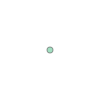

In [70]:
geom = shape(thing)
geom

## Performance

The shapely.speedups module contains performance enhancements written in C. They are automatically installed when Python has access to a compiler and GEOS development headers during installation.

You can check if the speedups are installed with the available attribute. To enable the speedups call enable(). You can revert to the slow implementation with disable().


In [71]:
from shapely import speedups
speedups.available

True

In [73]:
speedups.enable()

In [74]:
speedups.enabled

True